## Importing dataset and dependencies 

In [217]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random
from sklearn.learning_curve import learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
%matplotlib inline

In [2]:
df = pd.read_csv('bank-full.csv', delimiter= ';')
df_additional= pd.read_csv('bank-additional-full.csv',delimiter=';')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [5]:
df_additional.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df_additional.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

y — has the client subscribed a term deposit? (binary: “1”, means “Yes”, “0” means “No”)

## Exploratory data analysis

In [7]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
df_additional.info()
df_additional.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


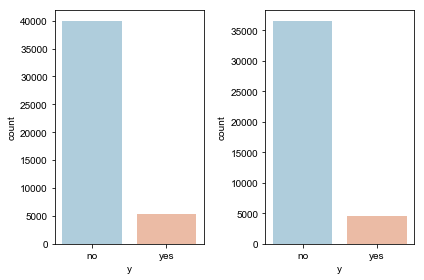

In [9]:
#We create the figure with the subplots:
f, axes = plt.subplots(1, 2)

#Where axes is an array with each subplot.

#Then we tell each plot in which subplot we want them with the argument ax.
sns.set_style('dark')
sns.countplot(x='y',data=df,palette='RdBu_r',ax=axes[0])
sns.countplot(x='y',data=df_additional,palette='RdBu_r',ax=axes[1])
plt.tight_layout()

In [10]:
#getting percentage of responses 
#as we can see data is biased, therefore we use sub-sampling methods
df['y'].value_counts()/df['y'].count()*100


no     88.30152
yes    11.69848
Name: y, dtype: float64

In [11]:
df_additional['y'].value_counts()/df_additional['y'].count()*100

no     88.734583
yes    11.265417
Name: y, dtype: float64

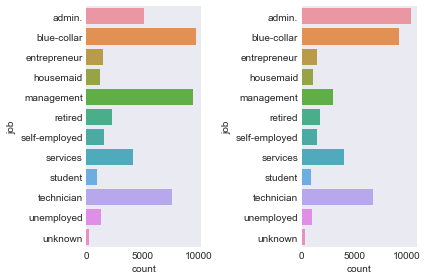

In [12]:
f, axes = plt.subplots(1, 2)
sns.countplot(y='job', data=df.sort_values('job'),ax=axes[0])
sns.countplot(y='job', data=df_additional.sort_values('job'),ax=axes[1])
plt.tight_layout()

Customer job distribution

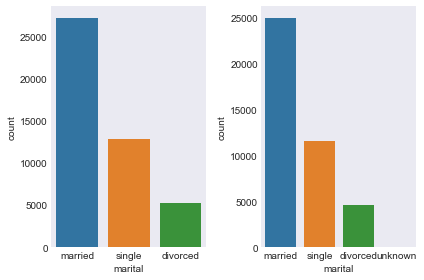

In [13]:
f, axes = plt.subplots(1, 2)
sns.countplot(x="marital", data=df,ax=axes[0])
sns.countplot(x="marital", data=df_additional,ax=axes[1])
plt.tight_layout()

Customer marital status distribution

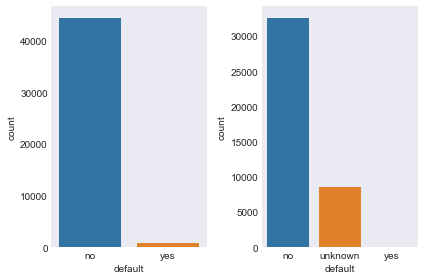

In [14]:
f, axes = plt.subplots(1, 2)
sns.countplot(x="default", data=df,ax=axes[0])
sns.countplot(x="default", data=df_additional,ax=axes[1])
plt.tight_layout()

Barplot for credit in default

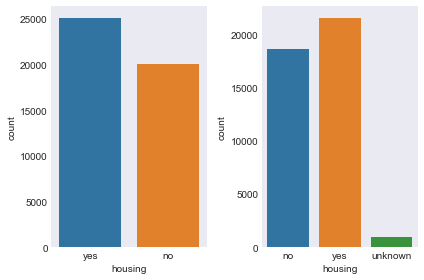

In [15]:
f, axes = plt.subplots(1, 2)
sns.countplot(x="housing", data=df, ax=axes[0])
sns.countplot(x="housing", data=df_additional,ax=axes[1])
plt.tight_layout()

Barplot for housing loan

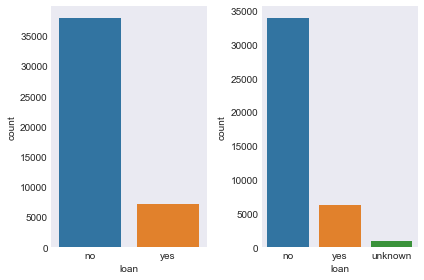

In [16]:
f, axes = plt.subplots(1, 2)
sns.countplot(x="loan", data=df,ax=axes[0])
sns.countplot(x="loan", data=df_additional,ax=axes[1])
plt.tight_layout()


Barplot for personal loan

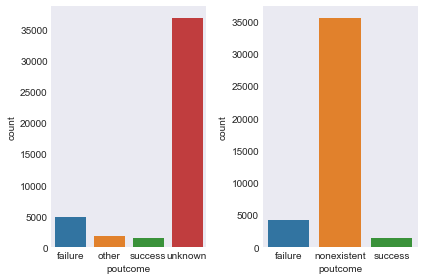

In [17]:
f, axes = plt.subplots(1, 2)
sns.countplot(x="poutcome", data=df.sort_values('poutcome'),ax=axes[0])
sns.countplot(x="poutcome", data=df_additional.sort_values('poutcome'),ax=axes[1])
plt.tight_layout()


Barplot for previous marketing campaign outcome

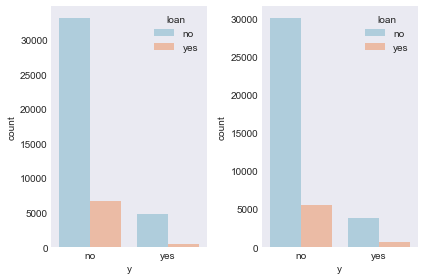

In [19]:
f, axes = plt.subplots(1, 2)
sns.countplot(x='y',data=df,hue = 'loan',palette='RdBu_r',ax=axes[0])
sns.countplot(x='y',data=df_additional,hue = 'loan',palette='RdBu_r',ax=axes[1])
plt.tight_layout()

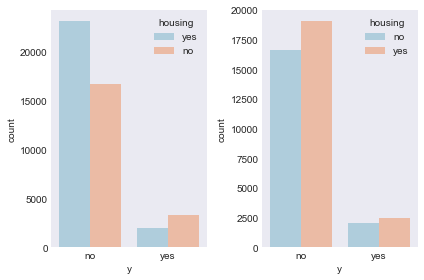

In [20]:
f, axes = plt.subplots(1, 2)
sns.countplot(x='y',data=df,hue = 'housing',palette='RdBu_r',ax=axes[0])
sns.countplot(x='y',data=df_additional,hue = 'housing',palette='RdBu_r',ax=axes[1])
plt.tight_layout()

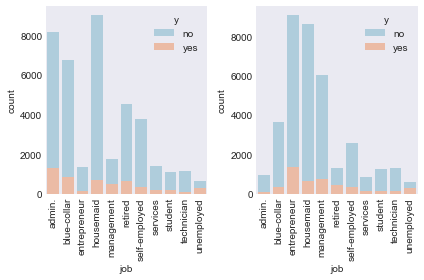

In [21]:
f, axes = plt.subplots(1, 2)

g1=sns.countplot(x='job',data=df,hue = 'y',palette='RdBu_r',dodge = False,ax=axes[0])
g2=sns.countplot(x='job',data=df_additional,hue = 'y',palette='RdBu_r',dodge = False,ax=axes[1])
g1.set_xticklabels(df['job'].sort_values().unique(),rotation=90)
g2.set_xticklabels(df_additional['job'].sort_values().unique(),rotation=90)
plt.tight_layout()

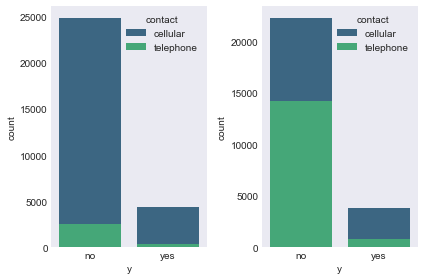

In [22]:
f, axes = plt.subplots(1, 2)
sns.countplot(x='y',data=df.sort_values('contact'),hue = 'contact',palette='viridis', dodge = False,ax=axes[0])
sns.countplot(x='y',data=df_additional.sort_values('contact'),hue = 'contact',palette='viridis', dodge = False,ax=axes[1])

plt.tight_layout()

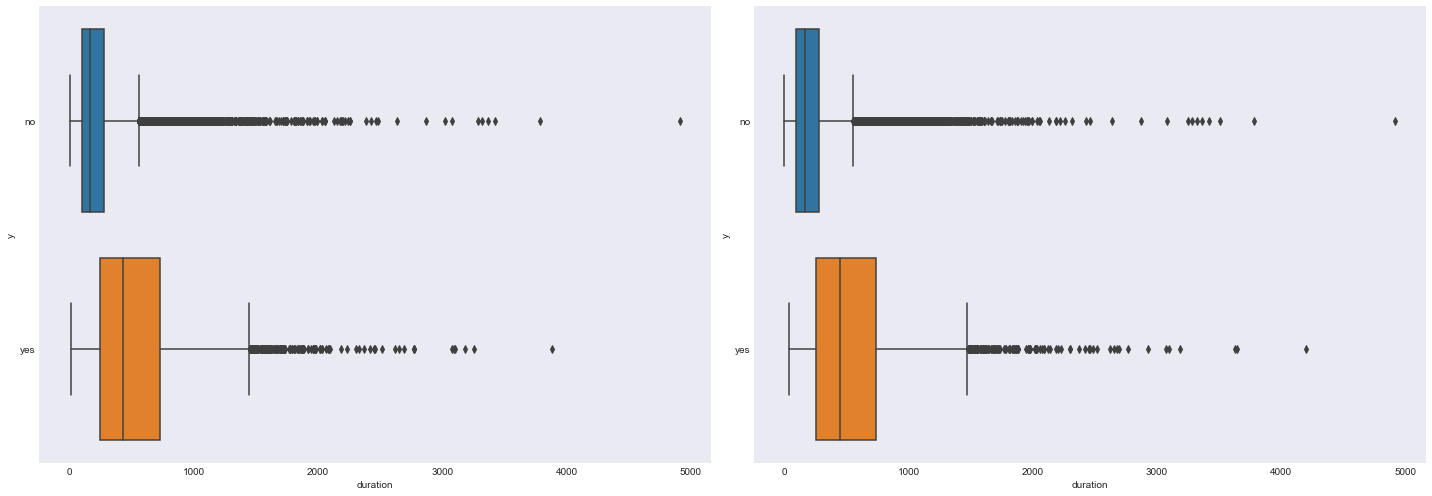

In [23]:
f, axes = plt.subplots(1, 2,figsize=(20,7))
sns.boxplot(x = 'duration', y = 'y', data = df,ax=axes[0])
sns.boxplot(x = 'duration', y = 'y', data = df_additional,ax=axes[1])
plt.tight_layout()

Median duration of the last contact is higher for subscribers than for non-subscribers. However, to keep in mind that for a subscriber, duration is not known till the call is over.

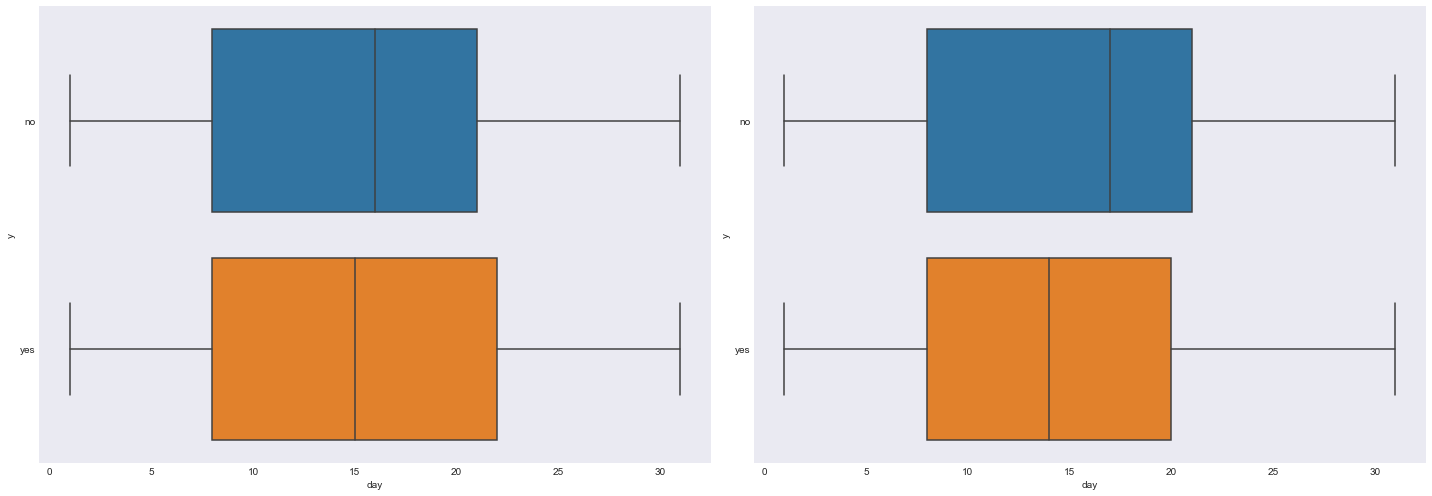

In [165]:
f, axes = plt.subplots(1, 2,figsize=(20,7))
sns.boxplot(df['day'],df['y'],ax=axes[0])
sns.boxplot(df['day'],df_additional['y'],ax=axes[1])
plt.tight_layout()

Last contact day of month

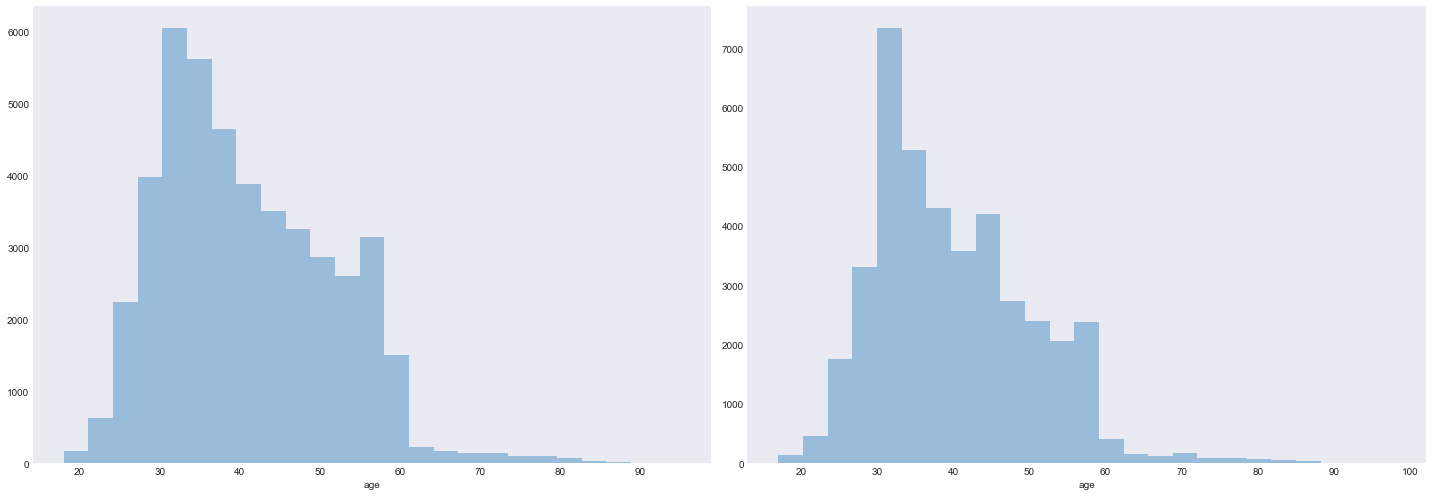

In [167]:
f, axes = plt.subplots(1, 2,figsize=(20,7))
sns.distplot(df['age'],kde = False,ax=axes[0],bins = 25)
sns.distplot(df_additional['age'],kde = False,ax=axes[1],bins = 25)

plt.tight_layout()

## Encoding categorical features 

In [168]:
#for bank data
obj_df = df.select_dtypes(include=['object']).copy()
obj_df_cols=obj_df.columns
data2 = pd.get_dummies(df, columns =obj_df_cols,drop_first= True)

In [27]:
obj_df

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,NaN,may,NaN,no
1,technician,single,secondary,no,yes,no,NaN,may,NaN,no
2,entrepreneur,married,secondary,no,yes,yes,NaN,may,NaN,no
3,blue-collar,married,NaN,no,yes,no,NaN,may,NaN,no
4,NaN,single,NaN,no,no,no,NaN,may,NaN,no
5,management,married,tertiary,no,yes,no,NaN,may,NaN,no
6,management,single,tertiary,no,yes,yes,NaN,may,NaN,no
7,entrepreneur,divorced,tertiary,yes,yes,no,NaN,may,NaN,no
8,retired,married,primary,no,yes,no,NaN,may,NaN,no
9,technician,single,secondary,no,yes,no,NaN,may,NaN,no


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          44923 non-null object
marital      45211 non-null object
education    43354 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      32191 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     8252 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [29]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 39 columns):
age                    45211 non-null int64
balance                45211 non-null int64
day                    45211 non-null int64
duration               45211 non-null int64
campaign               45211 non-null int64
pdays                  45211 non-null int64
previous               45211 non-null int64
job_blue-collar        45211 non-null uint8
job_entrepreneur       45211 non-null uint8
job_housemaid          45211 non-null uint8
job_management         45211 non-null uint8
job_retired            45211 non-null uint8
job_self-employed      45211 non-null uint8
job_services           45211 non-null uint8
job_student            45211 non-null uint8
job_technician         45211 non-null uint8
job_unemployed         45211 non-null uint8
marital_married        45211 non-null uint8
marital_single         45211 non-null uint8
education_secondary    45211 non-null uint8
education_t

In [169]:
#for bank additional data
obj_df_additional = df_additional.select_dtypes(include=['object']).copy()
obj_df_cols_additional=obj_df_additional.columns
data2_additional = pd.get_dummies(df_additional, columns =obj_df_cols_additional,drop_first= True)

In [170]:
data2_additional.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0


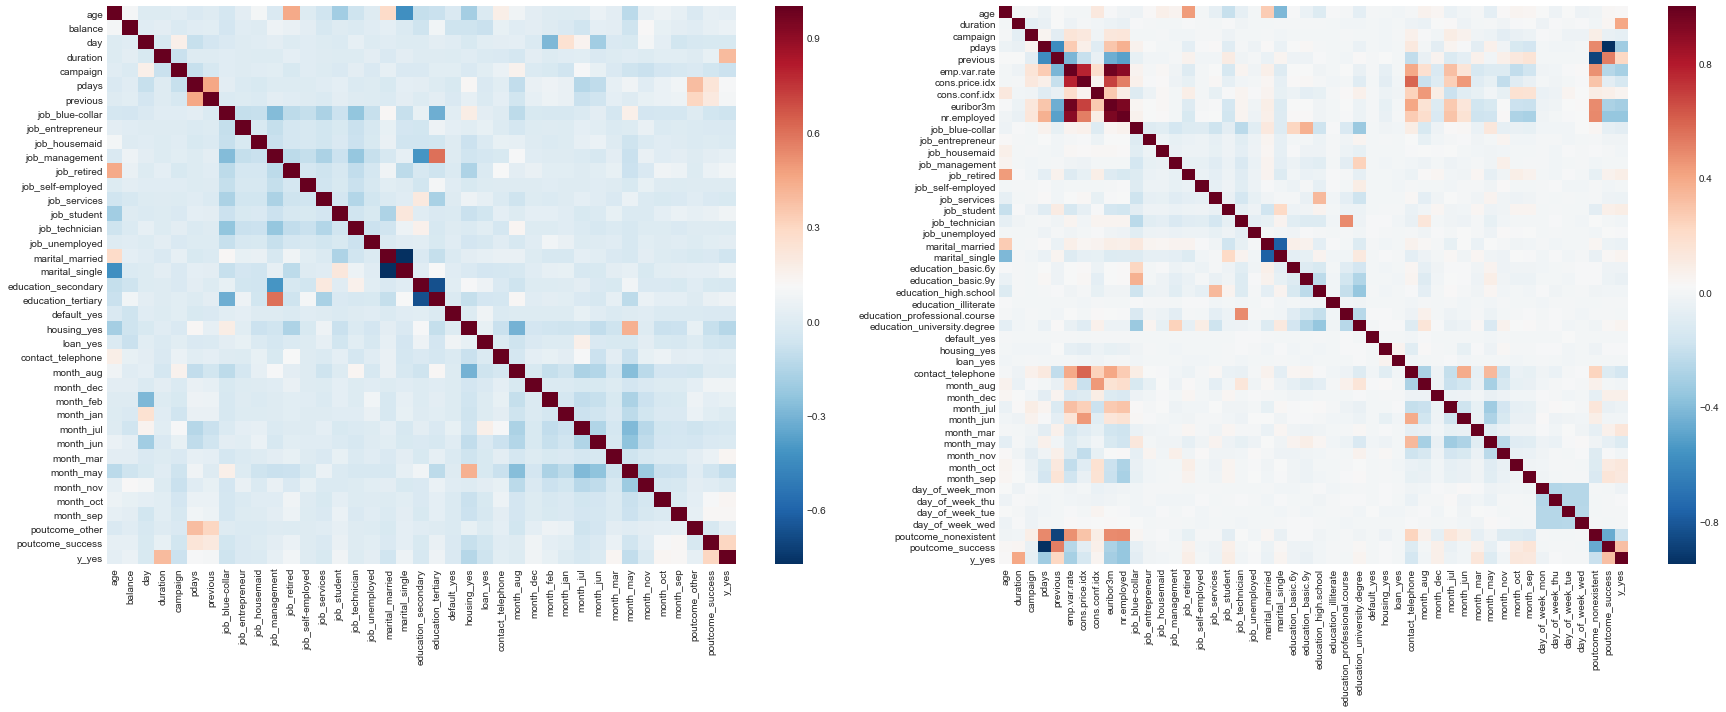

In [32]:
f, axes = plt.subplots(1, 2,figsize=(25,10))
sns.heatmap(data2.corr(),yticklabels=True,cmap='RdBu_r',ax=axes[0])
sns.heatmap(data2_additional.corr(),yticklabels=True,cmap='RdBu_r',ax=axes[1])
plt.tight_layout()

## Splitting the dataset

In [33]:
X_train, X_test, y_train, y_test = train_test_split(data2.drop('y_yes',axis=1), 
                                                    data2['y_yes'], test_size=0.30, 
                                                    random_state=101)

In [34]:
X_train.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success
26988,40,10406,21,348,2,127,4,0,0,0,...,0,0,0,0,0,1,0,0,1,0
44045,77,1047,30,108,5,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
535,45,756,6,179,2,-1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
39433,27,616,22,685,1,101,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
5241,36,8564,23,125,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [35]:
y_train.head()

26988    0
44045    0
535      0
39433    1
5241     0
Name: y_yes, dtype: uint8

# Function for all models

In [215]:
def model_build(X_train,y_train, X_test, y_test,model):
   if model == 'log':
       logmodel = LogisticRegression()
       logmodel.fit(X_train,y_train)
       predictions_log = logmodel.predict(X_test)
       predictions_train = logmodel.predict(X_train)
       print(classification_report(y_test,predictions_log))
       print ('Logistic accuracy score' ,accuracy_score(y_test, predictions_log))
       print ('Logistic training accuracy score' ,accuracy_score(y_train, predictions_train))
   elif model == 'dtree':
       dtree = DecisionTreeClassifier()
       dtree.fit(X_train,y_train)
       predictions = dtree.predict(X_test)
       predictions_t = dtree.predict(X_train)
       pred_prob = dtree.predict_proba(X_test)
       print(classification_report(y_test,predictions))
       print ('Decision tree accuracy score' ,accuracy_score(y_test, predictions))
       print ('Decision training tree accuracy score' ,accuracy_score(y_train, predictions_t))
       print (type(pred_prob))
   elif model == 'rfc':
       rfc = RandomForestClassifier(n_estimators=100)
       rfc.fit(X_train, y_train)
       rfc_pred = rfc.predict(X_test)
       rfc_pred_t = rfc.predict(X_train)
       print(classification_report(y_test,rfc_pred))
       print ('Random forest accuracy score', accuracy_score(y_test, rfc_pred))
       print ('Random forest training accuracy score', accuracy_score(y_train, rfc_pred_t))
   elif model == 'grid':
       rfc = RandomForestClassifier()
       rfc.fit(X_train, y_train)
       param_grid = {'n_estimators': [100,125,150], 'max_features': ['auto', 'sqrt', 'log2']}
       CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5,n_jobs= 5)
       CV_rfc.fit(X_train, y_train)
       print (CV_rfc.best_params_)
       CV_pred = CV_rfc.predict(X_test)
       CV_pred_t = CV_rfc.predict(X_train)
       print(classification_report(y_test,CV_pred))
       print ('Best accuracy score using grid', accuracy_score(y_test, CV_pred))
       print ('Best training accuracy score using grid', accuracy_score(y_train, CV_pred_t))


In [213]:
X_train.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success
26988,40,10406,21,348,2,127,4,0,0,0,...,0,0,0,0,0,1,0,0,1,0
44045,77,1047,30,108,5,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
535,45,756,6,179,2,-1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
39433,27,616,22,685,1,101,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
5241,36,8564,23,125,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [38]:
y_train.head()

26988    0
44045    0
535      0
39433    1
5241     0
Name: y_yes, dtype: uint8

## Applying logistic regression and checking accuracy score, prediction, etc.

In [39]:
model_build(X_train,y_train,X_test,y_test,'log')

             precision    recall  f1-score   support

          0       0.92      0.98      0.95     11967
          1       0.67      0.36      0.47      1597

avg / total       0.89      0.90      0.89     13564

Logistic accuracy score 0.9037894426422884
Logistic training accuracy score 0.8999589218567321


## Applying decision tree classifier and checking accuracy score, precision, etc.

In [216]:
model_build(X_train,y_train,X_test,y_test,'dtree')

             precision    recall  f1-score   support

          0       0.93      0.93      0.93     11967
          1       0.48      0.49      0.48      1597

avg / total       0.88      0.88      0.88     13564

Decision tree accuracy score 0.8768062518431141
Decision training tree accuracy score 1.0
<class 'numpy.ndarray'>


## Applying random forest classifier and checking accuracy score, precision, etc.

In [41]:
model_build(X_train,y_train,X_test,y_test,'rfc')

             precision    recall  f1-score   support

          0       0.92      0.98      0.95     11967
          1       0.68      0.40      0.51      1597

avg / total       0.90      0.91      0.90     13564

Random forest accuracy score 0.9076231200235919
Random forest training accuracy score 0.9999684014282555


## Applying grid search and checking accuracy score, precision, etc.

In [42]:
model_build(X_train,y_train,X_test,y_test,'grid')

{'max_features': 'sqrt', 'n_estimators': 125}
             precision    recall  f1-score   support

          0       0.92      0.98      0.95     11967
          1       0.69      0.40      0.51      1597

avg / total       0.90      0.91      0.90     13564

Best accuracy score using grid 0.9083603656738425
Best training accuracy score using grid 1.0


# Feature selection & model building using random classifier

In [43]:
def feat_sel(data,X_train,y_train,X_test,y_test,t):
   feat_label = list(data.columns)
   rfc = RandomForestClassifier(n_estimators=100)
   rfc.fit(X_train, y_train)
   for feature in zip(feat_label, rfc.feature_importances_):
       print(feature)
   rfc_pred = rfc.predict(X_test)
   sfm = SelectFromModel(rfc, threshold=t)
   sfm.fit(X_train, y_train)
   print('Most Important features')
   for feature_list_index in sfm.get_support(indices=True):        
       print(feat_label[feature_list_index])
   X_important_train = sfm.transform(X_train)
   X_important_test = sfm.transform(X_test)
   clf_important = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
   clf_important.fit(X_important_train, y_train)
   y_important_pred = clf_important.predict(X_important_test)
   print ("After building model on selected features")
   print(classification_report(y_test,y_important_pred))
   accuracy_score(y_test, y_important_pred)

In [44]:
feat_sel(data2,X_train,y_train,X_test,y_test,0.01)

('age', 0.10231337444049882)
('balance', 0.1070193029334015)
('day', 0.0895417739531866)
('duration', 0.2740693986892701)
('campaign', 0.04057772059962516)
('pdays', 0.046556948352818345)
('previous', 0.026059373750809196)
('job_blue-collar', 0.009315906775570086)
('job_entrepreneur', 0.0037763276268266634)
('job_housemaid', 0.0036558894715408036)
('job_management', 0.011099800740918491)
('job_retired', 0.005488183205440732)
('job_self-employed', 0.004913229182245163)
('job_services', 0.0064369497797896625)
('job_student', 0.004950495208035885)
('job_technician', 0.011360802644420537)
('job_unemployed', 0.004611473401817386)
('marital_married', 0.011806042782880739)
('marital_single', 0.009913563296144455)
('education_secondary', 0.013436961593808592)
('education_tertiary', 0.012356553631284467)
('default_yes', 0.0017930951857565813)
('housing_yes', 0.02072672263422328)
('loan_yes', 0.010020994584354676)
('contact_telephone', 0.007764100174054885)
('month_aug', 0.010414951891623314)
('

# Oversampling using SMOTE

In [73]:
sm = SMOTE(random_state=12, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(X_train, y_train)

C:\Users\Sayani\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [74]:
y_train.value_counts()

0    27955
1     3692
Name: y_yes, dtype: int64

In [75]:
np.bincount(y_train_res)

array([27955, 27955], dtype=int64)

In [76]:
model_build(x_train_res, y_train_res,X_test,y_test,'log')

             precision    recall  f1-score   support

          0       0.97      0.85      0.91     11967
          1       0.42      0.80      0.55      1597

avg / total       0.90      0.84      0.86     13564

Logistic accuracy score 0.8445148923621351
Logistic training accuracy score 0.8342157038096941


In [77]:
model_build(x_train_res, y_train_res,X_test,y_test,'dtree')

             precision    recall  f1-score   support

          0       0.93      0.92      0.93     11967
          1       0.45      0.48      0.46      1597

avg / total       0.87      0.87      0.87     13564

Decision tree accuracy score 0.8695075199056326
Decision training tree accuracy score 1.0


In [78]:
model_build(x_train_res, y_train_res,X_test,y_test,'rfc')

             precision    recall  f1-score   support

          0       0.93      0.97      0.95     11967
          1       0.66      0.42      0.51      1597

avg / total       0.89      0.91      0.90     13564

Random forest accuracy score 0.9059274550280153
Random forest training accuracy score 0.9999821141119657


In [80]:
model_build(x_train_res, y_train_res,X_test,y_test,'grid')

{'max_features': 'log2', 'n_estimators': 100}
             precision    recall  f1-score   support

          0       0.93      0.97      0.95     11967
          1       0.68      0.42      0.52      1597

avg / total       0.90      0.91      0.90     13564

Best accuracy score using grid 0.9081391919787674
Best training accuracy score using grid 1.0


In [83]:
feat_sel(data2,x_train_res, y_train_res,X_test,y_test,0.013)

('age', 0.030724650484539845)
('balance', 0.03392753179223393)
('day', 0.031487096656863195)
('duration', 0.21230436039913553)
('campaign', 0.02550761078777513)
('pdays', 0.022164873887232418)
('previous', 0.01870738501333876)
('job_blue-collar', 0.025739547844114193)
('job_entrepreneur', 0.00217104779072917)
('job_housemaid', 0.0019331109534837024)
('job_management', 0.021773250754671795)
('job_retired', 0.009910991281707028)
('job_self-employed', 0.0024295016555733336)
('job_services', 0.0048425519854922985)
('job_student', 0.005907032503997679)
('job_technician', 0.012050642027032616)
('job_unemployed', 0.0020777137663966975)
('marital_married', 0.061019267685042226)
('marital_single', 0.04296037804790438)
('education_secondary', 0.04929843397435943)
('education_tertiary', 0.03924478394409429)
('default_yes', 0.0007630760496569949)
('housing_yes', 0.09524289468569647)
('loan_yes', 0.015521502433136013)
('contact_telephone', 0.004394374386720408)
('month_aug', 0.0288096427195442)
('m

# Performing imputations on data

In [173]:
df.replace('unknown',np.NaN,inplace= True)
df_additional.replace('unknown',np.NaN,inplace= True)

In [46]:
df[df['education'] == 'secondary']['job'].value_counts()

blue-collar      5371
technician       5229
admin.           4219
services         3457
management       1121
retired           984
unemployed        728
self-employed     577
entrepreneur      542
student           508
housemaid         395
Name: job, dtype: int64

In [47]:
df[df['education'] == 'primary']['job'].value_counts()

blue-collar      3758
retired           795
housemaid         627
services          345
management        294
unemployed        257
admin.            209
entrepreneur      183
technician        158
self-employed     130
student            44
Name: job, dtype: int64

In [48]:
df[df['education'] == 'tertiary']['job'].value_counts()

management       7801
technician       1968
self-employed     833
entrepreneur      686
admin.            572
retired           366
unemployed        289
student           223
services          202
housemaid         173
blue-collar       149
Name: job, dtype: int64

In [49]:
def impute_job(cols):
    education = cols[0]
    job = cols[1]
    l = [0,1,2]
    if pd.isnull(job):

        if education == 'primary':
            return 'blue-collar'

        elif education == 'tertiary':
            return 'management'
        elif education == 'secondary':
            x = random.choice(l)
            if x == 0:
                return 'blue-collar'
            elif x == 1 :
                return 'technician'  
            else:
                return 'admin.'
    else:
        return job

In [50]:
df['job'] = df[['education','job']].apply(impute_job,axis=1)

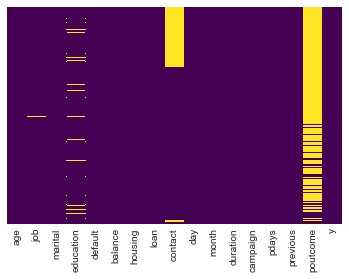

In [51]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [53]:
df[df['education'] == 'primary']['job'].unique()

array(['retired', 'blue-collar', 'admin.', 'services', 'self-employed',
       'technician', 'housemaid', 'entrepreneur', 'unemployed',
       'management', 'student'], dtype=object)

In [54]:
df[df['education'] == 'tertiary']['job'].unique()

array(['management', 'entrepreneur', 'self-employed', 'admin.', 'retired',
       'technician', 'unemployed', 'services', 'student', 'blue-collar',
       'housemaid'], dtype=object)

In [56]:
def impute_job1(cols):
    age = cols[0]
    job = cols[1]
    if pd.isnull(job):
        if age > 50:
            return 'retired'
    else:
        return job

In [57]:
df['job'] = df[['age','job']].apply(impute_job1,axis = 1)

In [58]:
df['education'].isna().value_counts()

False    43354
True      1857
Name: education, dtype: int64

In [59]:
df[df['education'].isna()]['job']

3         blue-collar
4                None
13         technician
16             admin.
42        blue-collar
44            retired
57        blue-collar
58        blue-collar
64        blue-collar
93        blue-collar
120        technician
122            admin.
130        management
137          services
150       blue-collar
156       blue-collar
160          services
172      entrepreneur
186          services
203           student
208          services
216              None
217        unemployed
224        technician
226        management
228       blue-collar
233       blue-collar
241      entrepreneur
245        management
291        technician
             ...     
44712      unemployed
44737         student
44742         retired
44762         retired
44779         retired
44789         student
44790         student
44796      management
44804         student
44816      management
44819      management
44823         student
44870         student
44871     blue-collar
44900     

In [60]:
df[df['job'] == 'management']['education'].value_counts()

tertiary     7840
secondary    1121
primary       294
Name: education, dtype: int64

In [62]:
df[df['job'] == 'blue-collar']['education'].value_counts()

secondary    5398
primary      3809
tertiary      149
Name: education, dtype: int64

In [63]:
def impute_job2(cols):
    job = cols[0]
    education = cols[1]
    if pd.isnull(education):
        if job == 'management' or job == 'entrepreneur' or job == 'self-employed':
            return 'tertiary'
        elif job == 'housemaid':
            return 'primary'
        elif job == 'blue-collar' or job == 'retired' or job == 'services' or job == 'admin.' or job == 'student' or job == 'technician' or job == 'unemployed':
            return 'secondary'
    else:
        return job

In [64]:
df['education'] = df[['job','education']].apply(impute_job2,axis = 1)

In [ ]:
df['contact'].value_counts()/df['contact'].count()*100

In [ ]:
df['contact'].replace(np.nan,'cellular',inplace = True)

# Bank - additional

In [171]:
data2_additional.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0


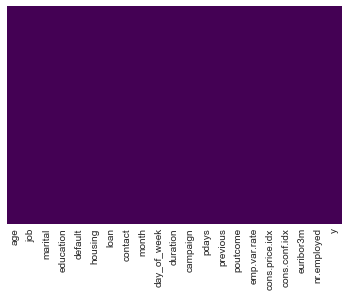

In [205]:
sns.heatmap(df_additional.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [175]:
df_additional['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
illiterate                18
Name: education, dtype: int64

In [185]:
df_additional['education'].replace(np.NaN,mode[0],inplace = True)

In [186]:
df_additional['age'].replace(np.NaN,df_additional['age'].median(),inplace = True)

In [192]:
df_additional['job'].replace(np.NaN,mode[0],inplace = True)

In [200]:
df_additional['loan'].replace(np.NaN,mode[0],inplace = True)

In [ ]:
df_additional['housing'].replace(np.NaN,mode[0],inplace = True)

In [204]:
df_additional['default'].replace(np.NaN,mode[0],inplace = True)

In [206]:
X_train_add, X_test_add, y_train_add, y_test_add = train_test_split(data2_additional.drop('y_yes',axis=1), 
                                                    data2_additional['y_yes'], test_size=0.30, 
                                                    random_state=101)


# Applying Logistic regression and checking accuracy score, precision, etc.

In [207]:
model_build(X_train_add,y_train_add,X_test_add,y_test_add,'log')

             precision    recall  f1-score   support

          0       0.93      0.98      0.95     10978
          1       0.66      0.38      0.49      1379

avg / total       0.90      0.91      0.90     12357

Logistic accuracy score 0.9096058913975884
Logistic training accuracy score 0.9093683881932642


# Applying Decision tree and checking accuracy score, precision, etc.

In [208]:
model_build(X_train_add,y_train_add,X_test_add,y_test_add,'dtree')

             precision    recall  f1-score   support

          0       0.94      0.93      0.94     10978
          1       0.50      0.53      0.51      1379

avg / total       0.89      0.89      0.89     12357

Decision tree accuracy score 0.8875940762320952
Decision training tree accuracy score 1.0


# Applying Random forest and checking accuracy score, precision, etc.

In [209]:
model_build(X_train_add,y_train_add,X_test_add,y_test_add,'rfc')

             precision    recall  f1-score   support

          0       0.93      0.97      0.95     10978
          1       0.65      0.45      0.53      1379

avg / total       0.90      0.91      0.90     12357

Random forest accuracy score 0.9114671845917294
Random forest training accuracy score 1.0


# Applying grid search and checking accuracy score, precision, etc.

In [218]:
model_build(X_train_add,y_train_add,X_test_add,y_test_add,'grid')

{'max_features': 'sqrt', 'n_estimators': 125}
             precision    recall  f1-score   support

          0       0.94      0.97      0.95     10978
          1       0.64      0.48      0.55      1379

avg / total       0.90      0.91      0.91     12357

Best accuracy score using grid 0.9121955167111758
Best training accuracy score using grid 1.0


# Feature selection and model building

In [90]:
feat_sel(data2_additional,X_train_add,y_train_add,X_test_add,y_test_add,0.013)

('age', 0.09154389388169046)
('duration', 0.2996112967209346)
('campaign', 0.042839935554110864)
('pdays', 0.026515184686597523)
('previous', 0.014761988884073094)
('emp.var.rate', 0.02341916104656432)
('cons.price.idx', 0.025566051775543445)
('cons.conf.idx', 0.026444939189500905)
('euribor3m', 0.10670901837780614)
('nr.employed', 0.0500575520685574)
('job_blue-collar', 0.008708235825178516)
('job_entrepreneur', 0.004109673294594368)
('job_housemaid', 0.003292530826025843)
('job_management', 0.007934293978801483)
('job_retired', 0.006365637939057819)
('job_self-employed', 0.0046462159987822995)
('job_services', 0.007010478527830786)
('job_student', 0.0049655241458648825)
('job_technician', 0.011348532907432016)
('job_unemployed', 0.004089851302913528)
('marital_married', 0.013689522169881117)
('marital_single', 0.011472099893553973)
('education_basic.6y', 0.00470203827528374)
('education_basic.9y', 0.008577314071214471)
('education_high.school', 0.011832505884100387)
('education_illit

In [103]:
sm = SMOTE(random_state=12, ratio = 'auto')
x_train_res_add, y_train_res_add = sm.fit_sample(X_train_add, y_train_add)

In [104]:
np.bincount(y_train_res_add)

array([25570, 25570], dtype=int64)

In [105]:
y_train_add.head()

7271     0
13284    0
11580    0
31835    0
19551    0
Name: y_yes, dtype: uint8

# Applying Logistic regression and checking accuracy score, precision, etc.

In [106]:
model_build(x_train_res_add,y_train_res_add,X_test_add,y_test_add,'log')

             precision    recall  f1-score   support

          0       0.98      0.86      0.92     10978
          1       0.44      0.87      0.59      1379

avg / total       0.92      0.86      0.88     12357

Logistic accuracy score 0.8621024520514688
Logistic training accuracy score 0.8752639812280015


# Applying Decision tree and checking accuracy score, precision, etc.

In [107]:
model_build(x_train_res_add,y_train_res_add,X_test_add,y_test_add,'dtree')

             precision    recall  f1-score   support

          0       0.94      0.93      0.93     10978
          1       0.48      0.51      0.49      1379

avg / total       0.89      0.88      0.88     12357

Decision tree accuracy score 0.8831431577243668
Decision training tree accuracy score 1.0


# Applying Random forest and checking accuracy score, precision, etc.

In [108]:
model_build(x_train_res_add,y_train_res_add,X_test_add,y_test_add,'rfc')

             precision    recall  f1-score   support

          0       0.94      0.96      0.95     10978
          1       0.62      0.49      0.55      1379

avg / total       0.90      0.91      0.90     12357

Random forest accuracy score 0.9095249656065388
Random forest training accuracy score 1.0
